# Visualization of Log Probabilities for Steering Self Preference

This notebook is for making histogram visualizations of log probability distributions that a model would choose its own output. The distributions are unfiltered, meaning that in the total set there is no clear wrong or clear right answer.

In [10]:
import json
with open("dbg_scores/cnn.jsonl", "r") as f:
    cnn_scores = [json.loads(line) for line in f.readlines()]
    cnn_objective = .89
with open("dbg_scores/xsum.jsonl", "r") as f:
    xsum_scores = [json.loads(line) for line in f.readlines()]
with open("dbg_scores/xsum_conscious.jsonl", "r") as f:
    xsum_conscious_scores = [json.loads(line) for line in f.readlines()]
with open("dbg_scores/xsum_aware.jsonl", "r") as f:
    xsum_aware_scores = [json.loads(line) for line in f.readlines()]
    xsum_objective = .477
with open("dbg_scores/apps.jsonl", "r") as f:
    apps_scores = [json.loads(line) for line in f.readlines()]
    apps_objective = .387

In [8]:
prob_list = lambda scores: [s['llama3.1-8b-instruct_prob'] for s in scores]

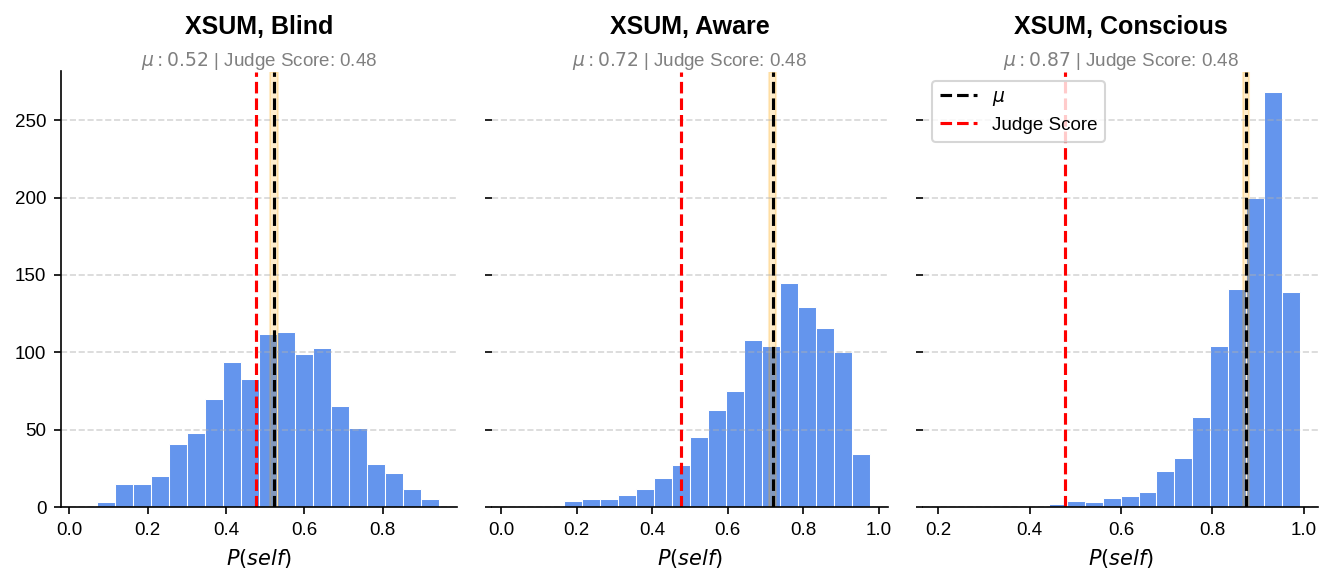

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bootstrap

plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ['Liberation Sans'],
    "font.size": 10,
    "axes.titlesize": 11,
    "axes.labelsize": 10,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    "legend.fontsize": 9,
    "figure.dpi": 150,
})
def plot_histogram_with_stats(ax, data, objective, title=None, xlabel=None, no_spine = False, **hist_kwargs):
    
    # Calculate mean and bootstrap CI
    mean = np.mean(data)
    # Ensure data is a 1D array for bootstrapping
    res = bootstrap((np.array(data),), np.mean) 
    CI = res.confidence_interval
    
    # Plotting
    ax.hist(data, **hist_kwargs)
    ax.axvline(mean, color='black', linestyle='--', label = "$\mu$")
    ax.axvline(objective, color='red', linestyle='--', label= "Judge Score")
    
    # --- IMPROVEMENT 1: Plot the CI directly ---
    ax.axvspan(CI.low, CI.high, alpha=0.2, color='orange')
    
    if title:
        ax.set_title(title, fontweight='bold', fontsize=12, pad=18)
        
        # --- IMPROVEMENT 2: Clearer subtitle ---
        subtitle = f"$\mu: {mean:.2f}$ | Judge Score: {objective:.2f}"
        ax.text(0.5, 1.0, subtitle,
                ha='center',            
                va='bottom',            
                transform=ax.transAxes,
                fontsize=9,
                color='gray')

    if xlabel:
        ax.set_xlabel(xlabel)
    if no_spine:
        ax.spines['left'].set_visible(False)
        
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

fig, ax = plt.subplots(ncols = 3, figsize=(9, 4), sharey=True)

plot_histogram_with_stats(
    ax=ax[0], 
    data=prob_list(xsum_scores), 
    objective = xsum_objective,
    title="XSUM, Blind", 
    xlabel="$P(self)$",
    bins=20,
    color='cornflowerblue',
    edgecolor='white',
    linewidth=0.5
)

plot_histogram_with_stats(
    ax=ax[1], 
    data=prob_list(xsum_aware_scores), 
    objective = xsum_objective,
    title="XSUM, Aware", 
    xlabel="$P(self)$",
    bins=20,
    color='cornflowerblue',
    edgecolor='white',
    linewidth=0.5,
    no_spine = True
)

plot_histogram_with_stats(
    ax=ax[2], 
    data=prob_list(xsum_conscious_scores), 
    objective = xsum_objective,
    title="XSUM, Conscious", 
    xlabel="$P(self)$",
    bins=20,
    color='cornflowerblue',
    edgecolor='white',
    linewidth=0.5,
    no_spine = True
)

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

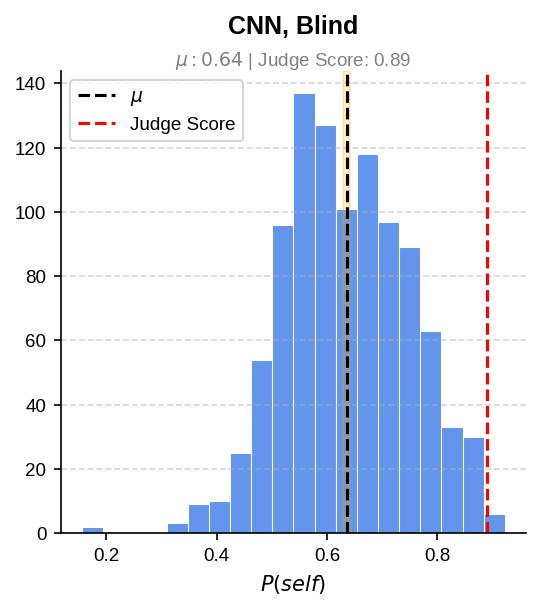

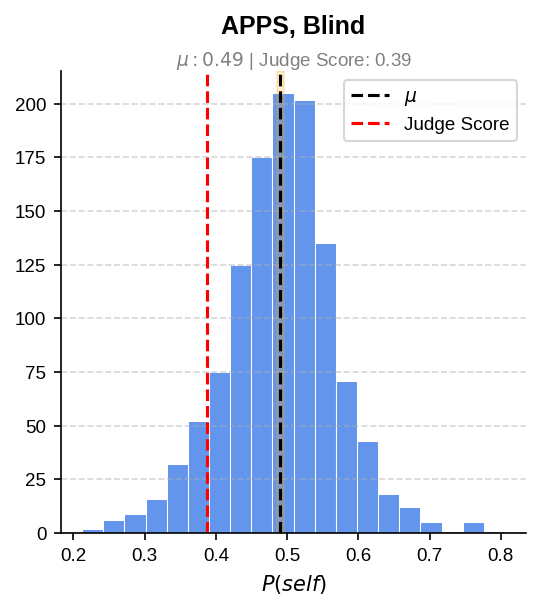

In [112]:
fig, ax = plt.subplots(figsize=(4, 4), sharey=True)

plot_histogram_with_stats(
    ax=ax,
    data=prob_list(cnn_scores), 
    objective=cnn_objective,
    title="CNN, Blind", 
    xlabel="$P(self)$",
    bins=20,
    color='cornflowerblue',
    edgecolor='white',
    linewidth=0.5
)
plt.legend()
plt.show()
fig, ax = plt.subplots(figsize=(4, 4), sharey=True)

plot_histogram_with_stats(
    ax=ax,
    data=prob_list(apps_scores), 
    objective=apps_objective,
    title="APPS, Blind", 
    xlabel="$P(self)$",
    bins=20,
    color='cornflowerblue',
    edgecolor='white',
    linewidth=0.5
)

plt.legend()
plt.show()

In [77]:
np.mean(np.array(prob_list(cnn_scores)) > 0.5)

np.float64(0.902)